In [ ]:
import os
from datasets import load_dataset

token = os.getenv('HF_TOKEN')
ds_100k = load_dataset("GGmorello/FLAMES_results", "100k", token=token)
#ds = load_dataset('GGmorello/FLAMES', 'infilled', split='train[:10000]', token=token, cache_dir='/Users/mojtabaeshghie/.cache/hf')#, num_proc=8)

In [ ]:
ds_llama = load_dataset("GGmorello/FLAMES_results", "default", token=token)

In [ ]:
ds_20k = load_dataset("GGmorello/FLAMES_results", "20k", token=token)

In [74]:
df_100k = ds_100k['train'].to_pandas()
df_llama = ds_llama['train'].to_pandas()
df_20k = ds_20k['train'].to_pandas()

In [ ]:
from predi.comparator import Comparator
comparator = Comparator()

## Evaluating 100k set

In [ ]:
from tqdm import tqdm

head_100 = df_100k.head(5000)
predi_failures = []
comparison_results = []
for i, row in tqdm(df_100k.iterrows(), total=len(df_100k)):
    ground_truth = row['predicate']
    synthesized = row['results']

    # test for exact string match between two predicates (first strip them out of any leading/trailing whitespaces)
    if ground_truth.strip() == synthesized.strip():
        comparison_results.append({'original_index': i, 'ground_truth': ground_truth, 'synthesized': synthesized, 'result': 'Exact Match'}) 
        continue
    
    # if not exact match, we will use predi to compare the two predicates
    try:
        result = comparator.compare(ground_truth, synthesized)
        comparison_results.append({'original_index': i, 'ground_truth': ground_truth, 'synthesized': synthesized, 'result': result})        
        #print(f"({i}) For predicates {pred1} ************* {pred2} ############## {result}")
    except Exception as e:
        comparison_results.append({'original_index': i, 'ground_truth': ground_truth, 'synthesized': synthesized, 'result': 'The predicates are not equivalent and neither is stronger.'})
        predi_failures.append(({'index': i, 'ground_truth': ground_truth, 'synthesized': synthesized, 'exception': e}))
        continue


In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# Assuming 'comparison_results' is already defined and is a DataFrame
data = pd.DataFrame.from_dict(comparison_results[0:5000])

# Calculate the result distribution
result_distribution = data['result'].value_counts()

# Define the updated color palette and use a pattern for the "Exact Match" bar
color_map_updated = {
    "The predicates are not equivalent and neither is stronger.": "#8c8c8c",
    "Exact Match": "#66c2a5",
    "The predicates are equivalent.": "#2ca25f",
    "The second predicate is stronger.": "#fc8d62",
    "The first predicate is stronger.": "#8da0cb"
}

# Create the bar plot with the updated color scheme and add patterns for specified bars
plt.figure(figsize=(6, 4))
bars = plt.bar(result_distribution.index, result_distribution.values, color=[color_map_updated.get(result, 'gray') for result in result_distribution.index])

# Add patterns to the "Exact Match" and "The predicates are equivalent." bars
for bar, label in zip(bars, result_distribution.index):
    if label == "Exact Match":
        bar.set_hatch('//')
    elif label == "The predicates are equivalent.":
        bar.set_hatch('xx')

# Adjust the y-axis limits to add space above the bars
plt.ylim(0, max(result_distribution.values) * 1.1)

# Add numbers on top of the bars with a smaller font size
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (max(result_distribution.values) * 0.02), int(yval), ha='center', va='bottom', fontsize=10)

# Set the labels with specified font sizes
plt.xlabel('Result', fontsize=11)
plt.ylabel('Count', fontsize=11)

# Remove x labels and add a legend below the plot with specified font size and updated labels
plt.xticks([])
legend_labels = [
    mpatches.Patch(color="#8c8c8c", label="The predicates are not equivalent and neither is stronger."),
    mpatches.Patch(facecolor="#66c2a5", hatch='//', label="Exact match"),
    mpatches.Patch(facecolor="#2ca25f", hatch='xx', label="The predicates are equivalent."),
    mpatches.Patch(color="#fc8d62", label="The synthesized is stronger."),
    mpatches.Patch(color="#8da0cb", label="Ground truth is stronger.")
]
plt.legend(handles=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1, fontsize=10)

# Adjust layout and save the plot as PDF with a suitable size for ACM papers
plt.tight_layout()
plt.savefig('match_results_distribution_acm.pdf')
plt.show()


## Evaluating 20k

In [ ]:
from tqdm import tqdm
import re

head_100 = df_20k.head(5000)
predi_failures_20k = []
comparison_results_20k = []
for i, row in tqdm(df_20k.head(5000).iterrows(), total=5000):
    ground_truth = row['predicate']
    synthesized = row['results']

    synthesized = re.sub(r',\s*".*$', '', synthesized)


    # test for exact string match between two predicates (first strip them out of any leading/trailing whitespaces)
    if ground_truth.strip() == synthesized.strip():
        comparison_results_20k.append({'original_index': i, 'ground_truth': ground_truth, 'synthesized': synthesized, 'result': 'Exact Match'}) 
        continue
    
    # if not exact match, we will use predi to compare the two predicates
    try:
        result = comparator.compare(ground_truth, synthesized)
        comparison_results_20k.append({'original_index': i, 'ground_truth': ground_truth, 'synthesized': synthesized, 'result': result})        
        #print(f"({i}) For predicates {pred1} ************* {pred2} ############## {result}")
    except Exception as e:
        comparison_results_20k.append({'original_index': i, 'ground_truth': ground_truth, 'synthesized': synthesized, 'result': 'The predicates are not equivalent and neither is stronger.'})
        predi_failures_20k.append(({'index': i, 'ground_truth': ground_truth, 'synthesized': synthesized, 'exception': e}))
        continue


In [ ]:
comparison_results_20k[0:5000][-1]

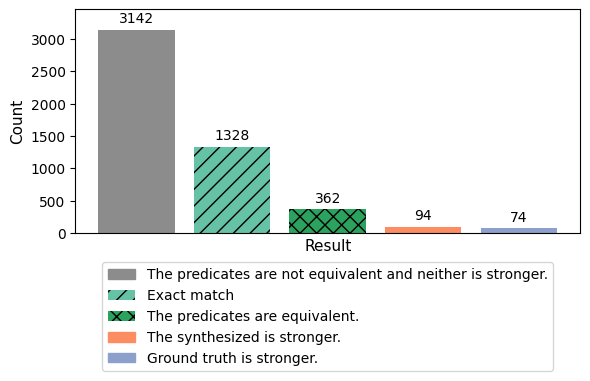

In [59]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# Assuming 'comparison_results' is already defined and is a DataFrame
data = pd.DataFrame.from_dict(comparison_results_20k[0:5000])

# Calculate the result distribution
result_distribution_20k = data['result'].value_counts()

# Define the updated color palette and use a pattern for the "Exact Match" bar
color_map_updated = {
    "The predicates are not equivalent and neither is stronger.": "#8c8c8c",
    "Exact Match": "#66c2a5",
    "The predicates are equivalent.": "#2ca25f",
    "The second predicate is stronger.": "#fc8d62",
    "The first predicate is stronger.": "#8da0cb"
}

# Create the bar plot with the updated color scheme and add patterns for specified bars
plt.figure(figsize=(6, 4))
bars = plt.bar(result_distribution_20k.index, result_distribution_20k.values, color=[color_map_updated.get(result, 'gray') for result in result_distribution_20k.index])

# Add patterns to the "Exact Match" and "The predicates are equivalent." bars
for bar, label in zip(bars, result_distribution_20k.index):
    if label == "Exact Match":
        bar.set_hatch('//')
    elif label == "The predicates are equivalent.":
        bar.set_hatch('xx')

# Adjust the y-axis limits to add space above the bars
plt.ylim(0, max(result_distribution_20k.values) * 1.1)

# Add numbers on top of the bars with a smaller font size
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (max(result_distribution_20k.values) * 0.02), int(yval), ha='center', va='bottom', fontsize=10)

# Set the labels with specified font sizes
plt.xlabel('Result', fontsize=11)
plt.ylabel('Count', fontsize=11)

# Remove x labels and add a legend below the plot with specified font size and updated labels
plt.xticks([])
legend_labels = [
    mpatches.Patch(color="#8c8c8c", label="The predicates are not equivalent and neither is stronger."),
    mpatches.Patch(facecolor="#66c2a5", hatch='//', label="Exact match"),
    mpatches.Patch(facecolor="#2ca25f", hatch='xx', label="The predicates are equivalent."),
    mpatches.Patch(color="#fc8d62", label="The synthesized is stronger."),
    mpatches.Patch(color="#8da0cb", label="Ground truth is stronger.")
]
plt.legend(handles=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1, fontsize=10)

# Adjust layout and save the plot as PDF with a suitable size for ACM papers
plt.tight_layout()
plt.savefig('match_results_distribution_acm_20k.pdf')
plt.show()

## Evaluating Llama

In [75]:
from tqdm import tqdm
import pandas as pd
import re

# Assuming df_llama is already defined and has the columns 'predicate' and 'results CodeLLama'

# Define the regex pattern for predicate extraction
pattern = r"(require\()?([^;,\"']+?)\s*(,|\);|;|$)"

# Function to extract predicates using regex
def extract_predicate(text):
    # Simplify text to handle edge cases like new lines and comments
    text = re.sub(r"//.*", "", text)  # Remove inline comments
    matches = re.search(pattern, text.replace('\n', ' '))
    if matches:
        return matches.group(2).strip()
    return None

# Update the dataframe to include 'synthesized' column from 'results CodeLLama'
df_llama['synthesized'] = df_llama['results CodeLLama'].apply(extract_predicate)

# Comparison logic
predi_failures_llama = []
comparison_results_llama = []
for i, row in tqdm(df_llama[0:5000].iterrows(), total=5000):
    ground_truth = row['predicate']
    synthesized = row['synthesized']

    if synthesized is None or ground_truth is None or synthesized == '' or ground_truth == '':
        predi_failures_llama.append({'index': i, 'ground_truth': ground_truth, 'synthesized': synthesized, 'exception': 'No predicate found in the synthesized code.'})
        continue
    
    # Test for exact string match between two predicates (first strip them out of any leading/trailing whitespaces)
    if ground_truth.strip() == synthesized.strip():
        comparison_results_llama.append({'original_index': i, 'ground_truth': ground_truth, 'synthesized': synthesized, 'result': 'Exact Match'})
        continue
    
    # If not exact match, use another method to compare the two predicates
    try:
        result = comparator.compare(ground_truth, synthesized)
        comparison_results_llama.append({'original_index': i, 'ground_truth': ground_truth, 'synthesized': synthesized, 'result': result})
        # Uncomment the print line below for detailed debug output
        # print(f"({i}) For predicates {ground_truth} ************* {synthesized} ############## {result}")
    except Exception as e:
        comparison_results_llama.append({'original_index': i, 'ground_truth': ground_truth, 'synthesized': synthesized, 'result': 'The predicates are not equivalent and neither is stronger.'})
        predi_failures_llama.append({'index': i, 'ground_truth': ground_truth, 'synthesized': synthesized, 'exception': e})
        continue

100%|██████████| 5000/5000 [38:39<00:00,  2.16it/s]  


In [69]:
df_llama[1999:5000].head()

,comment,input,label,original_idx,predicate,len,results CodeLLama
1999,"""Only manager can add address""","pragma solidity 0.5.17;\nimport ""../../other/t...","managerAddress[msg.sender],""Only manager can a...",51794,managerAddress[msg.sender],-26,"msg.sender == owner, ""Only owner can add Chef ..."
2000,None,// SPDX-License-Identifier: MIT\r\npragma soli...,_msgSender()==uCeabXV,142153,_msgSender()==uCeabXV,-21,
2001,None,interface ITweedentityStore {\r\n function is...,bytes(_appNickname).length>0,292287,bytes(_appNickname).length>0,-28,
2002,"""not in free claim whitelist""",// SPDX-License-Identifier: MIT\npragma solidi...,"_isWhitelisted(_freeClaimMerkleRoot,proof,msg....",352917,"_isWhitelisted(_freeClaimMerkleRoot,proof,msg....",-70,
2003,"""erc20 must not be 0""",// SPDX-License-Identifier: UNLICENSED\npragma...,"address(_erc20)!=address(0),""erc20 must not be 0""",368525,address(_erc20)!=address(0),-27,


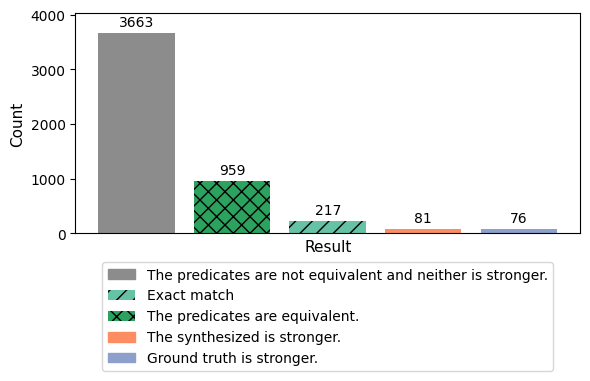

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# Assuming 'comparison_results' is already defined and is a DataFrame
data = pd.DataFrame.from_dict(comparison_results_llama[0:5000])

# Calculate the result distribution
result_distribution_llama = data['result'].value_counts()

# Define the updated color palette and use a pattern for the "Exact Match" bar
color_map_updated = {
    "The predicates are not equivalent and neither is stronger.": "#8c8c8c",
    "Exact Match": "#66c2a5",
    "The predicates are equivalent.": "#2ca25f",
    "The second predicate is stronger.": "#fc8d62",
    "The first predicate is stronger.": "#8da0cb"
}

# Create the bar plot with the updated color scheme and add patterns for specified bars
plt.figure(figsize=(6, 4))
bars = plt.bar(result_distribution_llama.index, result_distribution_llama.values, color=[color_map_updated.get(result, 'gray') for result in result_distribution_llama.index])

# Add patterns to the "Exact Match" and "The predicates are equivalent." bars
for bar, label in zip(bars, result_distribution_llama.index):
    if label == "Exact Match":
        bar.set_hatch('//')
    elif label == "The predicates are equivalent.":
        bar.set_hatch('xx')

# Adjust the y-axis limits to add space above the bars
plt.ylim(0, max(result_distribution_llama.values) * 1.1)

# Add numbers on top of the bars with a smaller font size
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (max(result_distribution_llama.values) * 0.02), int(yval), ha='center', va='bottom', fontsize=10)

# Set the labels with specified font sizes
plt.xlabel('Result', fontsize=11)
plt.ylabel('Count', fontsize=11)

# Remove x labels and add a legend below the plot with specified font size and updated labels
plt.xticks([])
legend_labels = [
    mpatches.Patch(color="#8c8c8c", label="The predicates are not equivalent and neither is stronger."),
    mpatches.Patch(facecolor="#66c2a5", hatch='//', label="Exact match"),
    mpatches.Patch(facecolor="#2ca25f", hatch='xx', label="The predicates are equivalent."),
    mpatches.Patch(color="#fc8d62", label="The synthesized is stronger."),
    mpatches.Patch(color="#8da0cb", label="Ground truth is stronger.")
]
plt.legend(handles=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1, fontsize=10)

# Adjust layout and save the plot as PDF with a suitable size for ACM papers
plt.tight_layout()
plt.savefig('match_results_distribution_acm_llama.pdf')
plt.show()

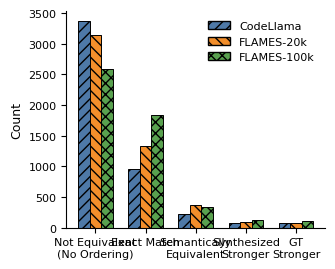

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib as mpl

# Categories
categories = [
    "Not Equivalent\n(No Ordering)", 
    "Exact Match", 
    "Semantically\nEquivalent", 
    "Synthesized\nStronger", 
    "GT\nStronger"
]

# Data
code_llama = [3363, 959, 217, 81, 76]
flames_2ok = [3142, 1328, 362, 94, 74]
flames_100k = [2595, 1840, 334, 125, 106]

x = np.arange(len(categories))
width = 0.23

# Professional color palette (colorblind-friendly)
colors = ['#4E79A7', '#F28E2B', '#59A14F']
hatches = ['///', '\\\\\\', 'xxx']

# Plot
fig, ax = plt.subplots(figsize=(3.45, 2.8))  # Fit into one IEEE column

bars1 = ax.bar(x - width, code_llama, width, label='CodeLlama', color=colors[0], hatch=hatches[0], edgecolor='black', linewidth=0.7)
bars2 = ax.bar(x, flames_2ok, width, label='FLAMES-20k', color=colors[1], hatch=hatches[1], edgecolor='black', linewidth=0.7)
bars3 = ax.bar(x + width, flames_100k, width, label='FLAMES-100k', color=colors[2], hatch=hatches[2], edgecolor='black', linewidth=0.7)

# Axes settings
ax.set_ylabel('Count', fontsize=9)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

# Legend
legend_patches = [
    mpatches.Patch(facecolor=colors[i], hatch=hatches[i], edgecolor='black', label=label)
    for i, label in enumerate(['CodeLlama', 'FLAMES-20k', 'FLAMES-100k'])
]
ax.legend(handles=legend_patches, fontsize=8, loc='upper right', frameon=False)

fig.tight_layout()
plt.show()


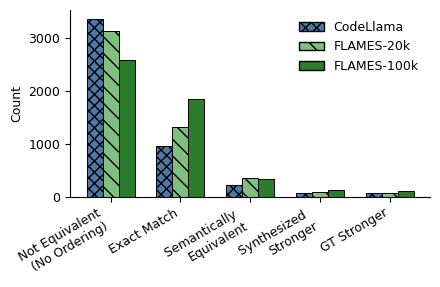

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Categories
categories = [
    "Not Equivalent\n(No Ordering)", 
    "Exact Match", 
    "Semantically \nEquivalent", 
    "Synthesized \nStronger", 
    "GT Stronger"
]

# Data
code_llama = [3363, 959, 217, 81, 76]
flames_2ok = [3142, 1328, 362, 94, 74]
flames_100k = [2595, 1840, 334, 125, 106]

x = np.arange(len(categories))
width = 0.23

# Colors: blue for CodeLlama, green shades for FLAMES
colors = ['#4E79A7', '#7FBF7F', '#2C7C2C']  # Blue, light green, dark green
hatches = ['xxx', '\\\\', '']

# Plot
#fig, ax = plt.subplots(figsize=(3.45, 2.8))  # IEEE column size
fig, ax = plt.subplots(figsize=(4.5, 3))  # IEEE column size


bars1 = ax.bar(x - width, code_llama, width, label='CodeLlama', color=colors[0], hatch=hatches[0], edgecolor='black', linewidth=0.7)
bars2 = ax.bar(x, flames_2ok, width, label='FLAMES-20k', color=colors[1], hatch=hatches[1], edgecolor='black', linewidth=0.7)
bars3 = ax.bar(x + width, flames_100k, width, label='FLAMES-100k', color=colors[2], hatch=hatches[2], edgecolor='black', linewidth=0.7)

# Axes settings
ax.set_ylabel('Count', fontsize=9)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=9, rotation=30, ha='right')
ax.tick_params(axis='y', labelsize=9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

# Legend
legend_patches = [
    mpatches.Patch(facecolor=colors[i], hatch=hatches[i], edgecolor='black', label=label)
    for i, label in enumerate(['CodeLlama', 'FLAMES-20k', 'FLAMES-100k'])
]
ax.legend(handles=legend_patches, fontsize=9, loc='upper right', frameon=False)
fig.savefig("predicate_comparison.pdf", format="pdf", bbox_inches="tight")

fig.tight_layout()
plt.show()
